<p style = "font-size : 42px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Hotel Booking Cancellation EDA and Prediction</strong></p>

<img style="margin-left: 10%; float: center;  border:5px solid #ffb037; width:80%; height : 80%;" src = https://www.rd.com/wp-content/uploads/2017/11/this-hotel-booking-secret-guarantees-you-ll-get-the-cheapest-rate-possible_520663291-rawpixel-com-1024x683.jpg> 

<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [EDA](#2.0)
    * [From where the most guests are coming ?](#2.1)
    * [How much do guests pay for a room per night?](#2.2)
    * [How does the price vary per night over the year?](#2.3)
    * [Which are the most busy months?](#2.4)
    * [How long do people stay at the hotels?](#2.5)
    
* [Data Pre Processing](#3.0)
* [Model Building](#4.0)
    * [Logistic Regression](#4.1)
    * [Knn](#4.2)
    * [Decision Tree Classifier](#4.3)
    * [Random Forest Classifier](#4.4)
    * [Ada Boost Classifier](#4.5)
    * [Gradient Boosting Classifier](#4.6)
    * [XgBoost](#4.7)
    * [Cat Boost Classifier](#4.8)
    * [Extra Trees Classifier](#4.9)
    * [LGBM Classifier](#4.10)
    * [ANN](#4.11)
    * [Voting Classifier](#4.12)

* [Models Comparison](#5.0)


In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [4]:
# reading data
df = pd.read_csv('./Dataset/HotelBookings Dataset.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     GBR         Direct               Direct  ...   
1   BB     GBR      Corporate            Corporate  ...   
2   BB     GBR      Online TA                TA/TO  ...   
3   BB     GBR      Online TA                TA/TO  ...   
4   BB     PRT         Direct               Direct  ...   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   A   
1                       0                               0                   A   
2                       0                               0                   A   
3                       0                               0                   A   
4                       0                               0                   C   

  assigned_room_type booking_changes  deposit_type  agent  company  \
0                  C               0    No Deposit   14.0    179.0   
1                  A               0    No Deposit  304.0    179.0   
2                  A               0    No Deposit  240.0    179.0   
3                  A               0    No Deposit  240.0    179.0   
4                  C               0    No Deposit   14.0    179.0   

   days_in_waiting_list  customer_type    adr  required_car_parking_spaces  \
0                     0      Transient   75.0                            0   
1                     0      Transient   75.0                            0   
2                     0      Transient   98.0                            0   
3                     0      Transient   98.0                            0   
4                     0      Transient  107.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out              2015-07-02   
1                          0           Check-Out              2015-07-02   
2                          1           Check-Out              2015-07-03   
3                          1           Check-Out              2015-07-03   
4                          0           Check-Out              2015-07-03   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  

[5 rows x 33 columns]

In [5]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  110716.000000  110716.000000      110716.000000   
mean        0.403627     103.564309        2016.145616   
std         0.490627      98.854763           0.708516   
min         0.000000       0.000000        2015.000000   
25%         0.000000      22.000000        2016.000000   
50%         0.000000      73.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     424.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             110716.000000               110716.00000   
mean                  27.089328                   15.76484   
std                   13.455216                    8.75648   
min                    1.000000                    1.00000   
25%                   16.000000                    8.00000   
50%                   27.000000                   16.00000   
75%                   38.000000                   23.00000   
max                   53.000000                   31.00000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            110716.000000         110716.000000  110716.000000   
mean                  0.883088              2.368808       1.874201   
std                   0.864838              1.487528       0.468527   
min                   0.000000              0.000000       1.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                   3.000000              8.000000       3.000000   

            children    babies  is_repeated_guest  previous_cancellations  \
count  110716.000000  110716.0           110716.0           110716.000000   
mean        0.038703       0.0                0.0                0.055439   
std         0.192886       0.0                0.0                0.229939   
min         0.000000       0.0                0.0                0.000000   
25%         0.000000       0.0                0.0                0.000000   
50%         0.000000       0.0                0.0                0.000000   
75%         0.000000       0.0                0.0                0.000000   
max         1.000000       0.0                0.0                2.000000   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   110716.000000    110716.000000  110716.000000   
mean                         0.006142         0.150556      69.139149   
std                          0.111394         0.427896      97.891823   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000      96.000000   
max                          4.000000         2.000000     394.000000   

             company  days_in_waiting_list            adr  \
count  110716.000000         110716.000000  110716.000000   
mean      179.253504              0.607681      99.980554   
std         6.944266              4.788421      41.467071   
min        86.000000              0.000000       0.000000   
25%       179.000000              0.000000      72.000000   
50%       179.000000              0.000000      95.000000   
75%       179.000000              0.000000     123.000000   
max       274.000000             55.000000     253.330000   

       required_car_parking_spaces  total_of_special_requests  
count                     110716.0              110716.000000  
mean                           0.0                   0.508888  
std                            0.0                   0.684934  
min                            0.0                   0.000000  
25%                            0.0                   0.000000  
5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110716 entries, 0 to 110715
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           110716 non-null  object 
 1   is_canceled                     110716 non-null  int64  
 2   lead_time                       110716 non-null  int64  
 3   arrival_date_year               110716 non-null  int64  
 4   arrival_date_month              110716 non-null  object 
 5   arrival_date_week_number        110716 non-null  int64  
 6   arrival_date_day_of_month       110716 non-null  int64  
 7   stays_in_weekend_nights         110716 non-null  int64  
 8   stays_in_week_nights            110716 non-null  int64  
 9   adults                          110716 non-null  int64  
 10  children                        110716 non-null  float64
 11  babies                          110716 non-null  int64  
 12  meal            

In [7]:
# checking for null values 

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
hotel                                     0                     0.0
is_canceled                               0                     0.0
lead_time                                 0                     0.0
arrival_date_year                         0                     0.0
arrival_date_month                        0                     0.0
arrival_date_week_number                  0                     0.0
arrival_date_day_of_month                 0                     0.0
stays_in_weekend_nights                   0                     0.0
stays_in_week_nights                      0                     0.0
adults                                    0                     0.0
children                                  0                     0.0
babies                                    0                     0.0
meal                                      0                     0.0
country                                   0                     0.0
market_segment                            0                     0.0
distribution_channel                      0                     0.0
is_repeated_guest                         0                     0.0
previous_cancellations                    0                     0.0
previous_bookings_not_canceled            0                     0.0
reserved_room_type                        0                     0.0
assigned_room_type                        0                     0.0
booking_changes                           0                     0.0
deposit_type                              0                     0.0
agent                                     0                     0.0
company                                   0                     0.0
days_in_waiting_list                      0                     0.0
customer_type                             0                     0.0
adr                                       0                     0.0
required_car_parking_spaces               0                     0.0
total_of_special_requests                 0                     0.0
reservation_status                        0                     0.0
reservation_status_date                   0                     0.0
arrival_date                              0                     0.0

In [8]:
# filling null values with zero

df.fillna(0, inplace = True)

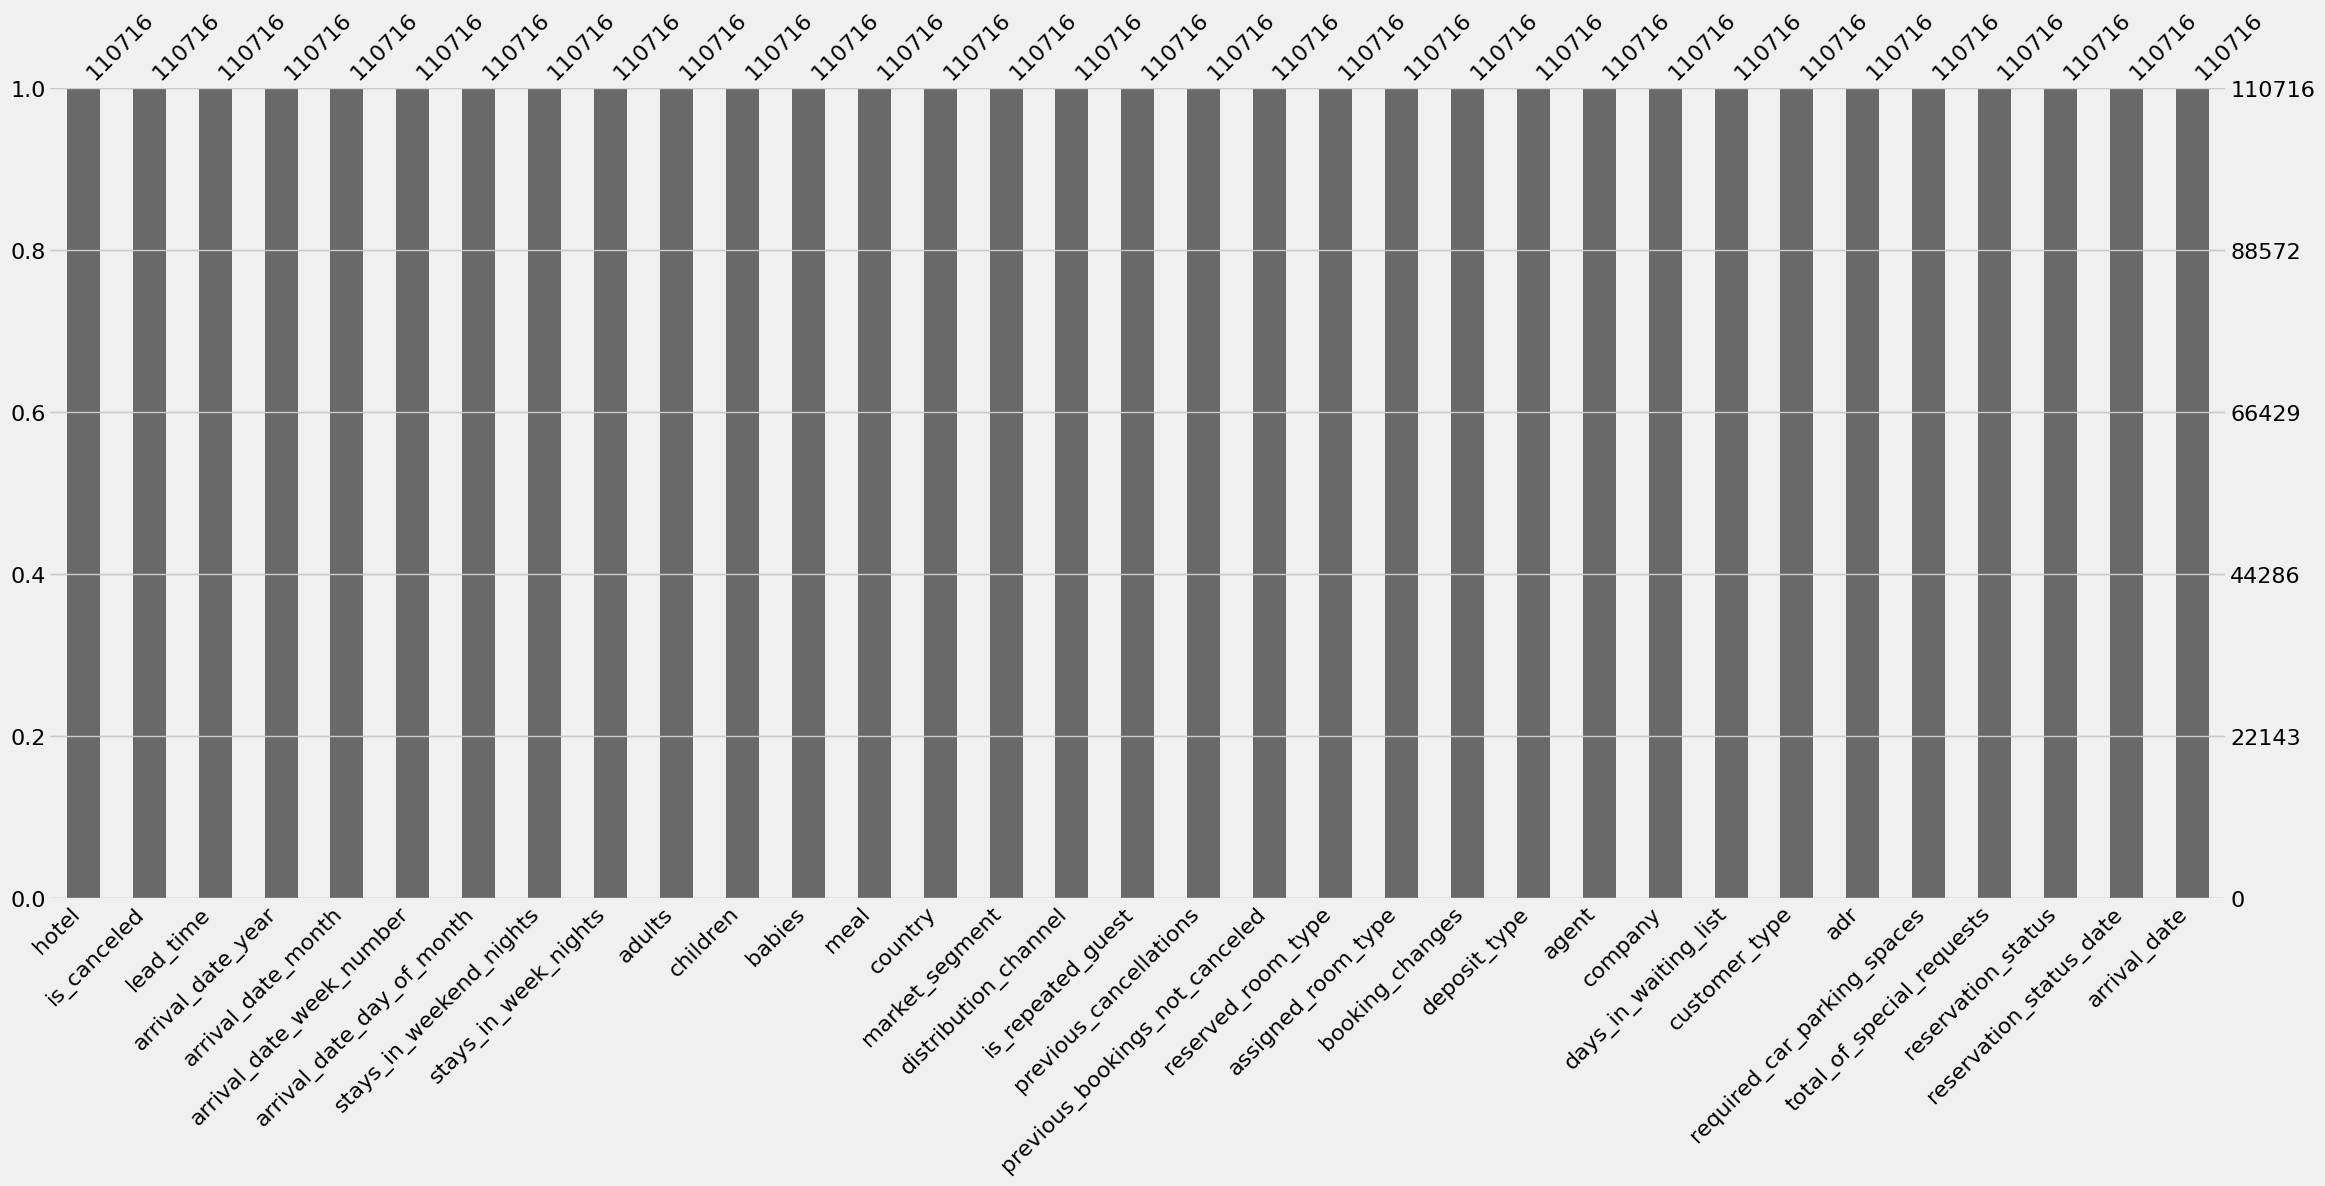

In [9]:
# visualizing null values
msno.bar(df)
plt.show()

In [10]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, arrival_date]
Index: []

[0 rows x 33 columns]

In [11]:
df = df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0          7               2015   
1       Resort Hotel            0         13               2015   
2       Resort Hotel            0         14               2015   
3       Resort Hotel            0         14               2015   
4       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
110711  Resort Hotel            0          8               2016   
110712    City Hotel            0         84               2017   
110713  Resort Hotel            0         28               2015   
110714  Resort Hotel            1        320               2017   
110715    City Hotel            1         27               2015   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
110711            October                        41   
110712              April                        15   
110713            October                        42   
110714               June                        22   
110715          September                        40   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
110711                          4                        0   
110712                         15                        2   
110713                         14                        0   
110714                          3                        2   
110715                         30                        0   

        stays_in_week_nights  adults  children  babies meal country  \
0                          1       1       0.0       0   BB     GBR   
1                          1       1       0.0       0   BB     GBR   
2                          2       2       0.0       0   BB     GBR   
3                          2       2       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
110711                     2       2       0.0       0   BB     PRT   
110712                     1       2       0.0       0   SC     AUT   
110713                     1       1       0.0       0   BB     GBR   
110714                     5       2       0.0       0   BB     IRL   
110715                     2       2       0.0       0   BB     PRT   

       market_segment distribution_channel  ...  previous_cancellations  \
0              Direct               Direct  ...                       0   
1           Corporate            Corporate  ...                       0   
2           Online TA                TA/TO  ...                       0   
3           Online TA                TA/TO  ...                       0   
4              Direct               Direct  ...                       0   
...               ...                  ...  ...                     ...   
110711      Online TA                TA/TO  ...                       0   
110712      Online TA                TA/TO  ...                       0   
110713         Direct               Direct  ...                       0   
110714      Online TA                TA/TO  ...                       0   
110715  Offline TA/TO                TA/TO  ...                       0   

        previous_bookings_not_canceled  reserved_r

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

<a id = '2.1'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>From where the most guests are coming ?.</strong></p> 

In [12]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         15651
1       GBR          8732
2       FRA          8241
3       DEU          6286
4       ESP          5407
..      ...           ...
154     MDG             1
155     NAM             1
156     CYM             1
157     DMA             1
158     FRO             1

[159 rows x 2 columns]

In [13]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.</strong></p> 

<a id = '2.2'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>How much do guests pay for a room per night?</strong></p> 

In [14]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     GBR         Direct               Direct  ...   
1   BB     GBR      Corporate            Corporate  ...   
2   BB     GBR      Online TA                TA/TO  ...   
3   BB     GBR      Online TA                TA/TO  ...   
4   BB     PRT         Direct               Direct  ...   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   A   
1                       0                               0                   A   
2                       0                               0                   A   
3                       0                               0                   A   
4                       0                               0                   C   

  assigned_room_type booking_changes  deposit_type  agent  company  \
0                  C               0    No Deposit   14.0    179.0   
1                  A               0    No Deposit  304.0    179.0   
2                  A               0    No Deposit  240.0    179.0   
3                  A               0    No Deposit  240.0    179.0   
4                  C               0    No Deposit   14.0    179.0   

   days_in_waiting_list  customer_type    adr  required_car_parking_spaces  \
0                     0      Transient   75.0                            0   
1                     0      Transient   75.0                            0   
2                     0      Transient   98.0                            0   
3                     0      Transient   98.0                            0   
4                     0      Transient  107.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out              2015-07-02   
1                          0           Check-Out              2015-07-02   
2                          1           Check-Out              2015-07-03   
3                          1           Check-Out              2015-07-03   
4                          0           Check-Out              2015-07-03   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  

[5 rows x 33 columns]

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot.</strong></p> 

In [15]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>The figure shows that the average price per room depends on its type and the standard deviation.</strong></p> 

<a id = '2.3'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>How does the price vary per night over the year?</strong></p> 

In [16]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [17]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   71.594216
1              August  164.788425
2            December   60.723651
3            February   52.818032
4             January   47.536809
5                July  138.524861
6                June  101.179792
7               March   55.333007
8                 May   74.027747
9            November   46.965874
10            October   58.913919
11          September   89.468462

In [18]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  109.334790
1              August  113.760799
2            December   86.204838
3            February   84.794842
4             January   82.663992
5                July  112.595788
6                June  117.704577
7               March   89.739284
8                 May  121.180859
9            November   88.113976
10            October  102.426382
11          September  111.801187

In [19]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

month  price_for_resort  price_for_city_hotel
0       April         71.594216            109.334790
1      August        164.788425            113.760799
2    December         60.723651             86.204838
3    February         52.818032             84.794842
4     January         47.536809             82.663992
5        July        138.524861            112.595788
6        June        101.179792            117.704577
7       March         55.333007             89.739284
8         May         74.027747            121.180859
9    November         46.965874             88.113976
10    October         58.913919            102.426382
11  September         89.468462            111.801187

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Now we observe here that month column is not in order, and if we visualize we will get improper conclusions.</strong></p>

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>So, first we have to provide right hierarchy to month column.</strong></p>

In [20]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=917d28fdbd745ba687be7ad22dd7d47d38711799d3c547d69f8532e9ad908b96
  Stored in directory: /Users/mayankraghav/Library/Caches/pip/wheels/ac/4c/ca/134c7282a08e7e2b149b1da1975c6686a262c15a92b78adcc7
Successfully built sort-dataframeby-monthorweek

[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=281beb8fdd4efe1b646c1c3ebdc594add7c597ff40aff1870a26817387cfaf8a
  Stored in directory: /Users/mayankraghav/Library/Caches/pip/wheels/4d/4f/f5/d9e3e3e60d80b3cdc2f69dfcf0d4bc45257abdea94f2035dbb
Successfully built sorted-months-weekdays

[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To upd

In [21]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [22]:
final_prices = sort_month(final_hotel, 'month')
final_prices

month  price_for_resort  price_for_city_hotel
0     January         47.536809             82.663992
1    February         52.818032             84.794842
2       March         55.333007             89.739284
3       April         71.594216            109.334790
4         May         74.027747            121.180859
5        June        101.179792            117.704577
6        July        138.524861            112.595788
7      August        164.788425            113.760799
8   September         89.468462            111.801187
9     October         58.913919            102.426382
10   November         46.965874             88.113976
11   December         60.723651             86.204838

In [23]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .</strong></p>

<a id = '2.4'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Which are the most busy months?</strong></p> 

In [24]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

month  no of guests
0      August          2209
1        July          2189
2     October          2039
3       April          1957
4       March          1939
5         May          1913
6    February          1687
7   September          1593
8     January          1454
9    December          1449
10   November          1345
11       June          1299

In [25]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

month  no of guests
0      August          4967
1        July          4615
2         May          4518
3        June          4418
4   September          4365
5       March          4232
6     October          4182
7       April          3948
8    February          2912
9    November          2608
10   December          2216
11    January          1974

In [26]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

month  no of guests in resort  no of guest in city hotel
0      August                    2209                       4967
1        July                    2189                       4615
2     October                    2039                       4182
3       April                    1957                       3948
4       March                    1939                       4232
5         May                    1913                       4518
6    February                    1687                       2912
7   September                    1593                       4365
8     January                    1454                       1974
9    December                    1449                       2216
10   November                    1345                       2608
11       June                    1299                       4418

In [27]:
final_guests = sort_month(final_guests,'month')
final_guests

month  no of guests in resort  no of guest in city hotel
0     January                    1454                       1974
1    February                    1687                       2912
2       March                    1939                       4232
3       April                    1957                       3948
4         May                    1913                       4518
5        June                    1299                       4418
6        July                    2189                       4615
7      August                    2209                       4967
8   September                    1593                       4365
9     October                    2039                       4182
10   November                    1345                       2608
11   December                    1449                       2216

In [28]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

<ul>
    <li style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower.</strong></li>
    <li style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Both hotels have the fewest guests during the winter.</strong></li>
</ul>

<a id = '2.5'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>How long do people stay at the hotels?</strong></p> 

In [29]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     GBR         Direct               Direct  ...   
1   BB     GBR      Corporate            Corporate  ...   
2   BB     GBR      Online TA                TA/TO  ...   
3   BB     GBR      Online TA                TA/TO  ...   
4   BB     PRT         Direct               Direct  ...   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   A   
1                       0                               0                   A   
2                       0                               0                   A   
3                       0                               0                   A   
4                       0                               0                   C   

  assigned_room_type booking_changes  deposit_type  agent  company  \
0                  C               0    No Deposit   14.0    179.0   
1                  A               0    No Deposit  304.0    179.0   
2                  A               0    No Deposit  240.0    179.0   
3                  A               0    No Deposit  240.0    179.0   
4                  C               0    No Deposit   14.0    179.0   

   days_in_waiting_list  customer_type    adr  required_car_parking_spaces  \
0                     0      Transient   75.0                            0   
1                     0      Transient   75.0                            0   
2                     0      Transient   98.0                            0   
3                     0      Transient   98.0                            0   
4                     0      Transient  107.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out              2015-07-02   
1                          0           Check-Out              2015-07-02   
2                          1           Check-Out              2015-07-03   
3                          1           Check-Out              2015-07-03   
4                          0           Check-Out              2015-07-03   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  

[5 rows x 33 columns]

In [30]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     GBR         Direct               Direct  ...   
1   BB     GBR      Corporate            Corporate  ...   
2   BB     GBR      Online TA                TA/TO  ...   
3   BB     GBR      Online TA                TA/TO  ...   
4   BB     PRT         Direct               Direct  ...   

   previous_bookings_not_canceled  reserved_room_type  assigned_room_type  \
0                               0                   A                   C   
1                               0                   A                   A   
2                               0                   A                   A   
3                               0                   A                   A   
4                               0                   C                   C   

  booking_changes deposit_type  agent company  days_in_waiting_list  \
0               0   No Deposit   14.0   179.0                     0   
1               0   No Deposit  304.0   179.0                     0   
2               0   No Deposit  240.0   179.0                     0   
3               0   No Deposit  240.0   179.0                     0   
4               0   No Deposit   14.0   179.0                     0   

   customer_type    adr required_car_parking_spaces  \
0      Transient   75.0                           0   
1      Transient   75.0                           0   
2      Transient   98.0                           0   
3      Transient   98.0                           0   
4      Transient  107.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out               2015-07-02   
1                          0           Check-Out               2015-07-02   
2                          1           Check-Out               2015-07-03   
3                          1           Check-Out               2015-07-03   
4                          0           Check-Out               2015-07-03   

  arrival_date total_nights  
0   2015-07-01            1  
1   2015-07-01            1  
2   2015-07-01            2  
3   2015-07-01            2  
4   2015-07-01            2  

[5 rows x 34 columns]

In [31]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              113
1              0  Resort Hotel              270
2              1    City Hotel             8135
3              1  Resort Hotel             4522
4              2    City Hotel            10874
5              2  Resort Hotel             3323
6              3    City Hotel            11641
7              3  Resort Hotel             2957
8              4    City Hotel             8005
9              4  Resort Hotel             2554
10             5    City Hotel             3341
11             5  Resort Hotel             1445
12             6    City Hotel             1130
13             6  Resort Hotel              899
14             7    City Hotel             1326
15             7  Resort Hotel             3891
16             8    City Hotel              205
17             8  Resort Hotel              394
18             9    City Hotel              109
19             9  Resort Hotel              290
20            10    City Hotel               61
21            10  Resort Hotel              463
22            11    City Hotel               15
23            11  Resort Hotel               65

In [32]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

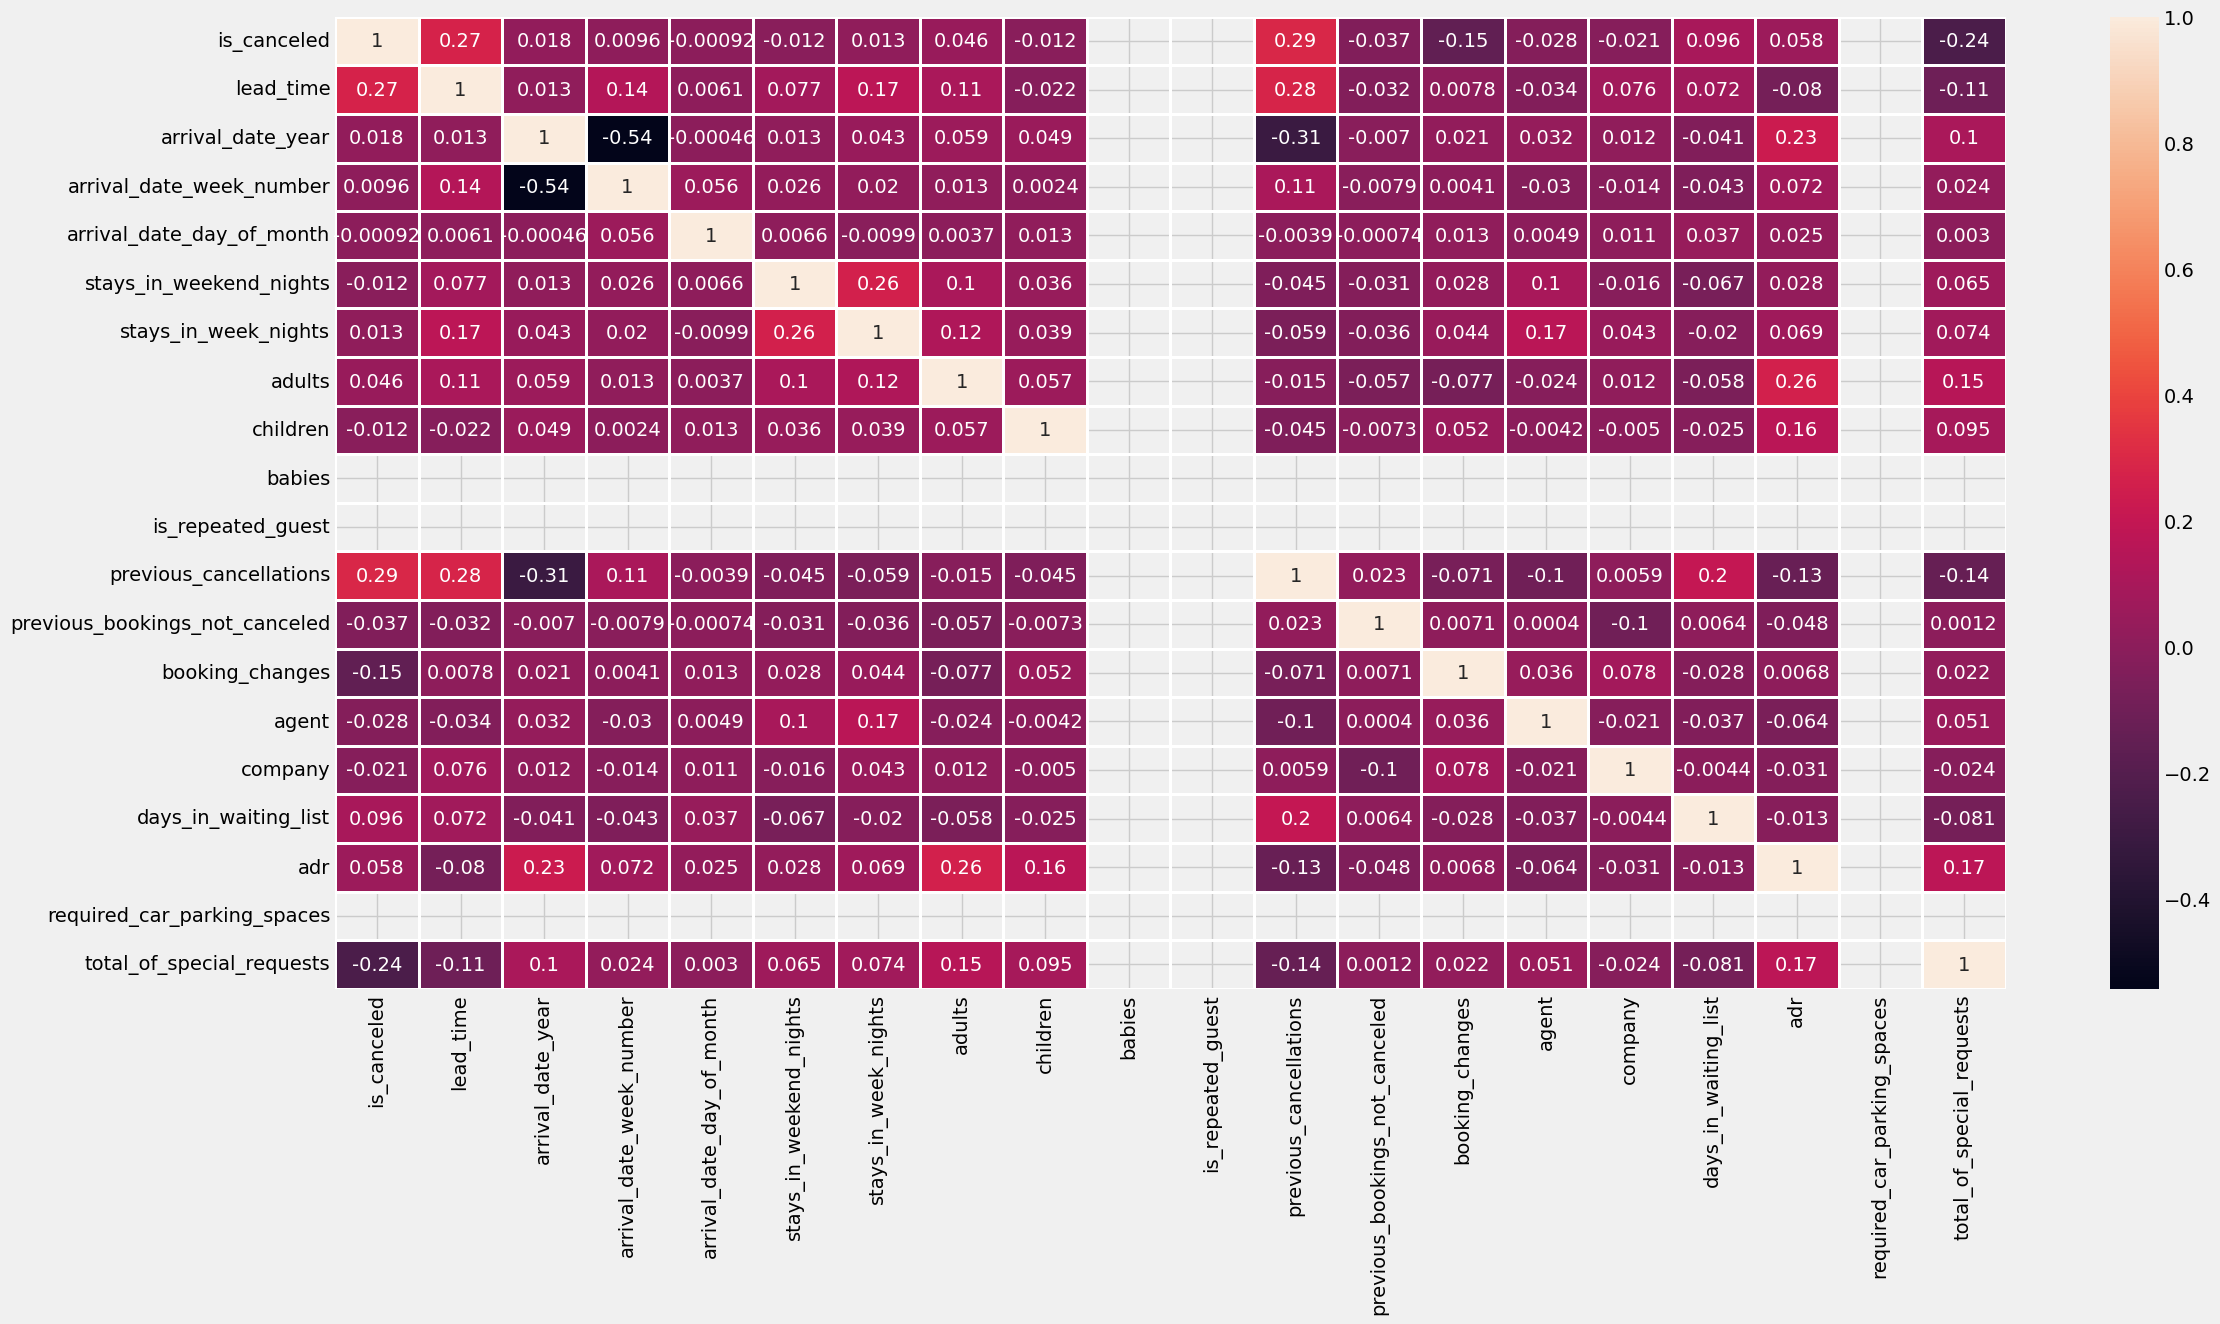

In [34]:
plt.figure(figsize = (24, 12))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [39]:
correlation = df.corr(numeric_only=True)['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
previous_cancellations            0.290991
lead_time                         0.272549
total_of_special_requests         0.241475
booking_changes                   0.154241
days_in_waiting_list              0.096472
adr                               0.058103
adults                            0.046236
previous_bookings_not_canceled    0.037427
agent                             0.027575
company                           0.021236
arrival_date_year                 0.018415
stays_in_week_nights              0.013238
children                          0.011982
stays_in_weekend_nights           0.011930
arrival_date_week_number          0.009632
arrival_date_day_of_month         0.000917
babies                                 NaN
is_repeated_guest                      NaN
required_car_parking_spaces            NaN
Name: is_canceled, dtype: float64

In [40]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [41]:
df.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0          7               July   
1  Resort Hotel            0         13               July   
2  Resort Hotel            0         14               July   
3  Resort Hotel            0         14               July   
4  Resort Hotel            0          0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal market_segment distribution_channel  is_repeated_guest  \
0   BB         Direct               Direct                  0   
1   BB      Corporate            Corporate                  0   
2   BB      Online TA                TA/TO                  0   
3   BB      Online TA                TA/TO                  0   
4   BB         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  A   
1                       0                               0                  A   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  C   

  deposit_type  agent  company customer_type    adr  \
0   No Deposit   14.0    179.0     Transient   75.0   
1   No Deposit  304.0    179.0     Transient   75.0   
2   No Deposit  240.0    179.0     Transient   98.0   
3   No Deposit  240.0    179.0     Transient   98.0   
4   No Deposit   14.0    179.0     Transient  107.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          0   
1                            0                          0   
2                            0                          1   
3                            0                          1   
4                            0                          0   

  reservation_status_date arrival_date  
0              2015-07-02   2015-07-01  
1              2015-07-02   2015-07-01  
2              2015-07-03   2015-07-01  
3              2015-07-03   2015-07-01  
4              2015-07-03   2015-07-01

In [42]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date',
 'arrival_date']

In [43]:
cat_df = df[cat_cols]
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB      Corporate            Corporate   
2  Resort Hotel               July   BB      Online TA                TA/TO   
3  Resort Hotel               July   BB      Online TA                TA/TO   
4  Resort Hotel               July   BB         Direct               Direct   

  reserved_room_type deposit_type customer_type reservation_status_date  \
0                  A   No Deposit     Transient              2015-07-02   
1                  A   No Deposit     Transient              2015-07-02   
2                  A   No Deposit     Transient              2015-07-03   
3                  A   No Deposit     Transient              2015-07-03   
4                  C   No Deposit     Transient              2015-07-03   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01

In [44]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [45]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [46]:
cat_df.head()

hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  A   
1  Resort Hotel   BB      Corporate            Corporate                  A   
2  Resort Hotel   BB      Online TA                TA/TO                  A   
3  Resort Hotel   BB      Online TA                TA/TO                  A   
4  Resort Hotel   BB         Direct               Direct                  C   

  deposit_type customer_type arrival_date  year  month  day  
0   No Deposit     Transient   2015-07-01  2015      7    2  
1   No Deposit     Transient   2015-07-01  2015      7    2  
2   No Deposit     Transient   2015-07-01  2015      7    3  
3   No Deposit     Transient   2015-07-01  2015      7    3  
4   No Deposit     Transient   2015-07-01  2015      7    3

In [47]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'Undefined' 'SC']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Groups' 'Complementary'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Non Refund' 'Refundable']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

arrival_date: 
['2015-07-01' '2015-07-02' '2015-07-03' '2015-07-04' '2015-07-05'
 '2015-07-06' '2015-07-07' '2015-07-08' '2015-07-09' '2015-07-10'
 '2015-07-11' '2015-07-12' '2015-07-13' '2015-07-14' '2015-07-15'
 '2015-07-16' '2015-07-17' '2015-07-18' '2015-07-19' '2015-07-20'
 '2015-07-21' '2015-07-22' '2015-07-23' '2015-07-24' '2015-07-25'
 '2015-07-26' '2015-07-27' '2015-07-28' '2015-07-29' '2015-07-30'
 '2015-07-31' '2015-08-01' '2015-08-02' '2015-08-03' '2015-08-04'
 '2015-08-05' '2015-08-06' '2015-08-07' '2015-08-08' '2015-08-09'


In [74]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [75]:
cat_df.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0    NaN   NaN             NaN                   NaN                 NaN   
1    NaN   NaN             NaN                   NaN                 NaN   
2    NaN   NaN             NaN                   NaN                 NaN   
3    NaN   NaN             NaN                   NaN                 NaN   
4    NaN   NaN             NaN                   NaN                 NaN   

   deposit_type  customer_type arrival_date  year  month  day  
0           NaN            NaN   2015-07-01   NaN      7    2  
1           NaN            NaN   2015-07-01   NaN      7    2  
2           NaN            NaN   2015-07-01   NaN      7    3  
3           NaN            NaN   2015-07-01   NaN      7    3  
4           NaN            NaN   2015-07-01   NaN      7    3

In [50]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0               7                        27                          1   
1              13                        27                          1   
2              14                        27                          1   
3              14                        27                          1   
4               0                        27                          1   
...           ...                       ...                        ...   
110711          8                        41                          4   
110712         84                        15                         15   
110713         28                        42                         14   
110714        320                        22                          3   
110715         27                        40                         30   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     1       1       0.0   
1                             0                     1       1       0.0   
2                             0                     2       2       0.0   
3                             0                     2       2       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
110711                        0                     2       2       0.0   
110712                        2                     1       2       0.0   
110713                        0                     1       1       0.0   
110714                        2                     5       2       0.0   
110715                        0                     2       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
110711       0                  0                       0   
110712       0                  0                       0   
110713       0                  0                       0   
110714       0                  0                       0   
110715       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
0                                    0   14.0    179.0   75.00   
1                                    0  304.0    179.0   75.00   
2                                    0  240.0    179.0   98.00   
3                                    0  240.0    179.0   98.00   
4                                    0   14.0    179.0  107.00   
...                                ...    ...      ...     ...   
110711                               0  314.0    179.0   80.00   
110712                               0    9.0    179.0  114.00   
110713                               0  250.0    179.0   47.00   
110714                               0  240.0    179.0   74.25   
110715                               0   64.0    179.0  108.00   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          1  
3                                 0                          1  
4                                 0                          0  
...                             ...                        ...  
110711                            0                          1  
110712                            0                          2  
110713                            0                          0  
110714                            0       

In [68]:
num_df.var()

lead_time                         2.315613
arrival_date_week_number          0.423788
arrival_date_day_of_month         0.502015
stays_in_weekend_nights           0.747945
stays_in_week_nights              2.212739
adults                            0.219517
children                          0.037205
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.052872
previous_bookings_not_canceled    0.012409
agent                             2.149414
company                           0.001645
adr                               0.392580
required_car_parking_spaces       0.000000
total_of_special_requests         0.469135
dtype: float64

In [52]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [53]:
num_df.var()

lead_time                         2.315613
arrival_date_week_number          0.423788
arrival_date_day_of_month         0.502015
stays_in_weekend_nights           0.747945
stays_in_week_nights              2.212739
adults                            0.219517
children                          0.037205
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.052872
previous_bookings_not_canceled    0.012409
agent                             2.149414
company                           0.001645
adr                               0.392580
required_car_parking_spaces       0.000000
total_of_special_requests         0.469135
dtype: float64

In [54]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [55]:
num_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   2.079442                  3.332205                   0.693147   
1   2.639057                  3.332205                   0.693147   
2   2.708050                  3.332205                   0.693147   
3   2.708050                  3.332205                   0.693147   
4   0.000000                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1       0.0       0   
1                        0                     1       1       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent   company       adr  required_car_parking_spaces  \
0  2.708050  5.192957  4.330733                            0   
1  5.720312  5.192957  4.330733                            0   
2  5.484797  5.192957  4.595120                            0   
3  5.484797  5.192957  4.595120                            0   
4  2.708050  5.192957  4.682131                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          1  
3                          1  
4                          0

In [69]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [70]:
X.shape, y.shape

((110716, 27), (110716,))

In [71]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [73]:
X_train.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
78838    NaN   NaN             NaN                   NaN                 NaN   
45944    NaN   NaN             NaN                   NaN                 NaN   
16026    NaN   NaN             NaN                   NaN                 NaN   
7242     NaN   NaN             NaN                   NaN                 NaN   
18698    NaN   NaN             NaN                   NaN                 NaN   

       deposit_type  customer_type arrival_date  year  month  day  lead_time  \
78838           NaN            NaN   2016-12-08   NaN     12   11   3.218876   
45944           NaN            NaN   2017-02-24   NaN      1   19   3.713572   
16026           NaN            NaN   2016-04-06   NaN      4   11   3.218876   
7242            NaN            NaN   2016-11-12   NaN      9   27   3.871201   
18698           NaN            NaN   2016-08-24   NaN      8   31   5.609472   

       arrival_date_week_number  arrival_date_day_of_month  \
78838                  3.931826                   2.197225   
45944                  2.197225                   3.218876   
16026                  2.772589                   1.945910   
7242                   3.850148                   2.564949   
18698                  3.583519                   3.218876   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
78838                        0                     3       2       0.0   
45944                        2                     2       2       0.0   
16026                        1                     4       2       0.0   
7242                         2                     2       2       0.0   
18698                        2                     5       1       0.0   

       babies  is_repeated_guest  previous_cancellations  \
78838       0                  0                       0   
45944       0                  0                       0   
16026       0                  0                       0   
7242        0                  0                       0   
18698       0                  0                       0   

       previous_bookings_not_canceled     agent   company       adr  \
78838                               0  5.062595  5.192957  4.563619   
45944                               0  2.302585  5.192957  4.634729   
16026                               0  5.484797  5.192957  4.414010   
7242                                0  5.484797  5.192957  4.186620   
18698                               0  5.147494  5.192957  4.851249   

       required_car_parking_spaces  total_of_special_requests  
78838                            0                          0  
45944                            0                          0  
16026                            0                          0  
7242                             0                          0  
18698                            0                          1

In [60]:
X_test.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
76631      1     0               2                     2                   2   
96386      1     0               2                     2                   2   
72645      1     0               2                     2                   1   
49657      1     3               2                     2                   1   
62602      1     0               3                     2                   1   

       deposit_type  customer_type arrival_date  year  month  day  lead_time  \
76631             0              0   2016-10-25     2     10   28   5.159055   
96386             0              0   2017-01-26     3      1   27   3.433987   
72645             0              0   2016-08-20     2      8   21   1.791759   
49657             0              0   2017-05-09     3      4   24   2.944439   
62602             0              2   2016-01-27     2      1   29   4.077537   

       arrival_date_week_number  arrival_date_day_of_month  \
76631                  3.806662                   3.258097   
96386                  1.609438                   3.295837   
72645                  3.555348                   3.044522   
49657                  2.995732                   2.302585   
62602                  1.791759                   3.332205   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
76631                        0                     3       2       0.0   
96386                        0                     1       3       0.0   
72645                        0                     1       2       0.0   
49657                        0                     3       2       0.0   
62602                        0                     2       1       0.0   

       babies  is_repeated_guest  previous_cancellations  \
76631       0                  0                       0   
96386       0                  0                       0   
72645       0                  0                       0   
49657       0                  0                       0   
62602       0                  0                       0   

       previous_bookings_not_canceled     agent   company       adr  \
76631                               0  2.302585  5.192957  4.657763   
96386                               0  2.302585  5.192957  5.000585   
72645                               0  2.197225  5.192957  4.875197   
49657                               0  2.302585  5.192957  5.017280   
62602                               0  4.477337  5.192957  4.406719   

       required_car_parking_spaces  total_of_special_requests  
76631                            0                          2  
96386                            0                          0  
72645                            0                          1  
49657                            0                          2  
62602                            0                          0

In [61]:
y_train.head(), y_test.head()

(97391     1
 105505    1
 100447    1
 28940     0
 49650     1
 Name: is_canceled, dtype: int64,
 76631    0
 96386    0
 72645    0
 49657    1
 62602    0
 Name: is_canceled, dtype: int64)

<a id = '4.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

<a id = '4.1'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p> 

In [62]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

ValueError: could not convert string to float: '2017-05-19'

<a id = '4.2'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>KNN</strong></p> 

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.3'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.4'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p> 

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.5'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p> 

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.6'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p> 

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.7'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>XgBoost Classifier</strong></p> 

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.8'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Cat Boost Classifier</strong></p> 

In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

In [ ]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.9'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p> 

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.10'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p> 

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.12'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Voting Classifier</strong></p> 

In [ ]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat), ('XGboost', xgb),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

In [ ]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id = '4.11'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>ANN</strong></p> 

In [ ]:
from tensorflow.keras.utils import to_categorical

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(df['is_canceled'])

In [ ]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

In [ ]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, 101)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

In [ ]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

<a id = '5.0'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_vtc, acc_ann]
})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<p style = "font-size : 30px; color : #03506f ; font-family : 'Comic Sans MS'; "><strong>We got accuracy score of 99.5% which is quite impresive.</strong></p> 

<p style = "font-size : 25px; color : #f55c47 ; font-family : 'Comic Sans MS'; "><strong>If you like my work, please do Upvote.</strong></p> 